# Temperature Forecast Case study

Problem Statement:

This data is for the purpose of bias correction of next-day maximum and minimum air temperatures forecast of the LDAPS model operated by the Korea Meteorological Administration over Seoul, South Korea. This data consists of summer data from 2013 to 2017. The input data is largely composed of the LDAPS model's next-day forecast data, in-situ maximum and minimum temperatures of present-day, and geographic auxiliary variables. There are two outputs (i.e. next-day maximum and minimum air temperatures) in this data. Hindcast validation was conducted for the period from 2015 to 2017.

Loading the required libraries

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error,mean_absolute_error
import warnings
warnings.filterwarnings('ignore')

In [3]:
#Uploading the the data set
data =pd.read_csv('Temperature.csv')

In [4]:
ds=pd.DataFrame(data=data)
ds

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
0,1.0,30-06-2013,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,...,0.000000,0.000000,0.000000,37.6046,126.991,212.3350,2.785000,5992.895996,29.1,21.2
1,2.0,30-06-2013,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,...,0.000000,0.000000,0.000000,37.6046,127.032,44.7624,0.514100,5869.312500,30.5,22.5
2,3.0,30-06-2013,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,...,0.000000,0.000000,0.000000,37.5776,127.058,33.3068,0.266100,5863.555664,31.1,23.9
3,4.0,30-06-2013,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,...,0.000000,0.000000,0.000000,37.6450,127.022,45.7160,2.534800,5856.964844,31.7,24.3
4,5.0,30-06-2013,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,...,0.000000,0.000000,0.000000,37.5507,127.135,35.0380,0.505500,5859.552246,31.2,22.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7747,23.0,30-08-2017,23.3,17.1,26.741310,78.869858,26.352081,18.775678,6.148918,72.058294,...,0.000000,0.000000,0.000000,37.5372,126.891,15.5876,0.155400,4443.313965,28.3,18.1
7748,24.0,30-08-2017,23.3,17.7,24.040634,77.294975,27.010193,18.733519,6.542819,47.241457,...,0.000000,0.000000,0.000000,37.5237,126.909,17.2956,0.222300,4438.373535,28.6,18.8
7749,25.0,30-08-2017,23.2,17.4,22.933014,77.243744,27.939516,18.522965,7.289264,9.090034,...,0.000000,0.000000,0.000000,37.5237,126.970,19.5844,0.271300,4451.345215,27.8,17.4
7750,NaN,NaN,20.0,11.3,19.794666,58.936283,17.624954,14.272646,2.882580,-13.603212,...,0.000000,0.000000,0.000000,37.4562,126.826,12.3700,0.098475,4329.520508,17.4,11.3


# EDA

In [5]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7752 entries, 0 to 7751
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   station           7750 non-null   float64
 1   Date              7750 non-null   object 
 2   Present_Tmax      7682 non-null   float64
 3   Present_Tmin      7682 non-null   float64
 4   LDAPS_RHmin       7677 non-null   float64
 5   LDAPS_RHmax       7677 non-null   float64
 6   LDAPS_Tmax_lapse  7677 non-null   float64
 7   LDAPS_Tmin_lapse  7677 non-null   float64
 8   LDAPS_WS          7677 non-null   float64
 9   LDAPS_LH          7677 non-null   float64
 10  LDAPS_CC1         7677 non-null   float64
 11  LDAPS_CC2         7677 non-null   float64
 12  LDAPS_CC3         7677 non-null   float64
 13  LDAPS_CC4         7677 non-null   float64
 14  LDAPS_PPT1        7677 non-null   float64
 15  LDAPS_PPT2        7677 non-null   float64
 16  LDAPS_PPT3        7677 non-null   float64


There are 7752 rows and 25 columns. Except date all are float type varibale. Target varibales are continous and float type.


In [6]:
# Checking missing values
ds.isnull().sum()

station              2
Date                 2
Present_Tmax        70
Present_Tmin        70
LDAPS_RHmin         75
LDAPS_RHmax         75
LDAPS_Tmax_lapse    75
LDAPS_Tmin_lapse    75
LDAPS_WS            75
LDAPS_LH            75
LDAPS_CC1           75
LDAPS_CC2           75
LDAPS_CC3           75
LDAPS_CC4           75
LDAPS_PPT1          75
LDAPS_PPT2          75
LDAPS_PPT3          75
LDAPS_PPT4          75
lat                  0
lon                  0
DEM                  0
Slope                0
Solar radiation      0
Next_Tmax           27
Next_Tmin           27
dtype: int64

There are null values in almost all the columns.

<AxesSubplot:>

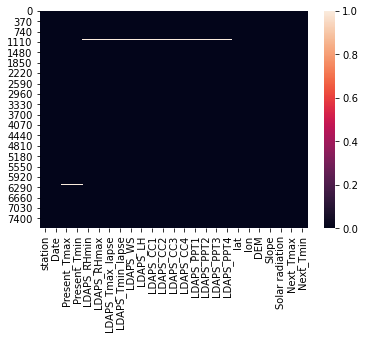

In [7]:
sns.heatmap(ds.isnull())

The heat map also Shows null values in in almost all the columns.

In [8]:
ds.describe()

,station,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
count,7750.000000,7682.000000,7682.000000,7677.000000,7677.000000,7677.000000,7677.000000,7677.000000,7677.000000,7677.000000,...,7677.000000,7677.000000,7677.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7725.000000,7725.000000
mean,13.000000,29.768211,23.225059,56.759372,88.374804,29.613447,23.512589,7.097875,62.505019,0.368774,...,0.485003,0.278200,0.269407,37.544722,126.991397,61.867972,1.257048,5341.502803,30.274887,22.932220
std,7.211568,2.969999,2.413961,14.668111,7.192004,2.947191,2.345347,2.183836,33.730589,0.262458,...,1.762807,1.161809,1.206214,0.050352,0.079435,54.279780,1.370444,429.158867,3.128010,2.487613
min,1.000000,20.000000,11.300000,19.794666,58.936283,17.624954,14.272646,2.882580,-13.603212,0.000000,...,0.000000,0.000000,0.000000,37.456200,126.826000,12.370000,0.098475,4329.520508,17.400000,11.300000
25%,7.000000,27.800000,21.700000,45.963543,84.222862,27.673499,22.089739,5.678705,37.266753,0.146654,...,0.000000,0.000000,0.000000,37.510200,126.937000,28.700000,0.271300,4999.018555,28.200000,21.300000
50%,13.000000,29.900000,23.400000,55.039024,89.793480,29.703426,23.760199,6.547470,56.865482,0.315697,...,0.000000,0.000000,0.000000,37.550700,126.995000,45.716000,0.618000,5436.345215,30.500000,23.100000
75%,19.000000,32.000000,24.900000,67.190056,93.743629,31.710450,25.152909,8.032276,84.223616,0.575489,...,0.018364,0.007896,0.000041,37.577600,127.042000,59.832400,1.767800,5728.316406,32.600000,24.600000
max,25.000000,37.600000,29.900000,98.524734,100.000153,38.542255,29.619342,21.857621,213.414006,0.967277,...,21.621661,15.841235,16.655469,37.645000,127.135000,212.335000,5.178230,5992.895996,38.900000,29.800000


Key observation: 1) The mean and 50% vluaes are similar for almost all the columns.
    2)There is not much defference between 75% and max for most of the columns.. It shows there are not many outliers present.

<AxesSubplot:>

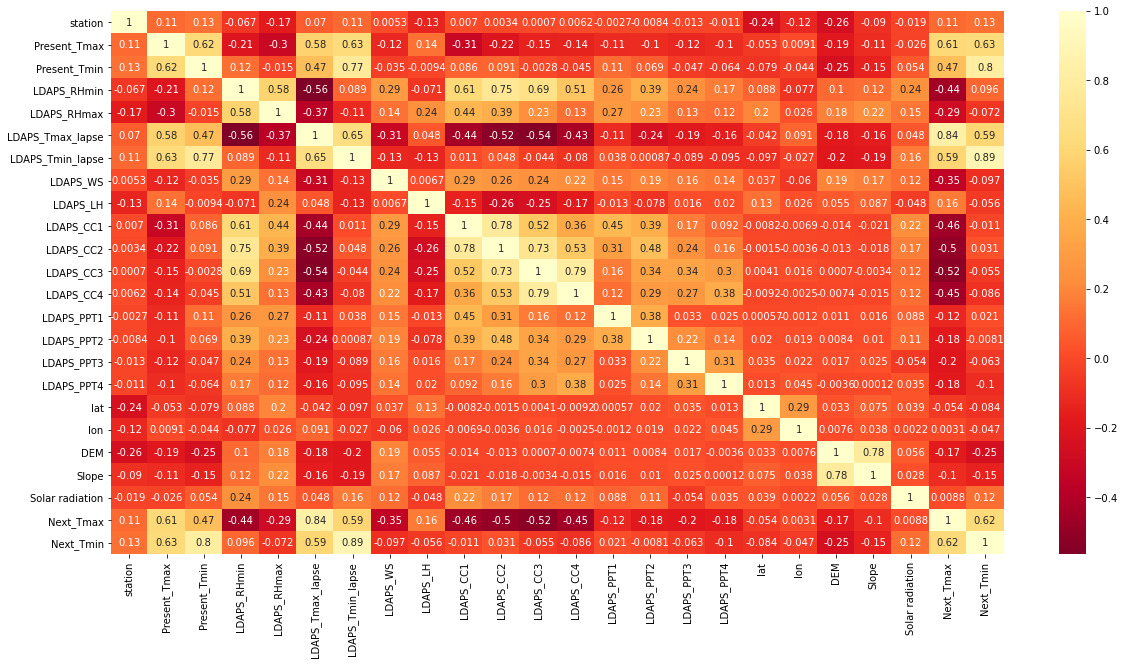

In [9]:
# Correlation Matrix ---Pearson Method
dfcor=ds.corr()
plt.figure(figsize=(20,10))
sns.heatmap(dfcor,cmap="YlOrRd_r",annot=True)

Key Obeservations: Present_Tmax & Present_Tmin are highly correlated with the Target varibales.
    2)LDAPS_CC1,LDAPS_CC2,LDAPS_CC3 ,LDAPS_RHmin are negatively correlted with target variables.
    3)Station ans Date variables does't show any correltion.

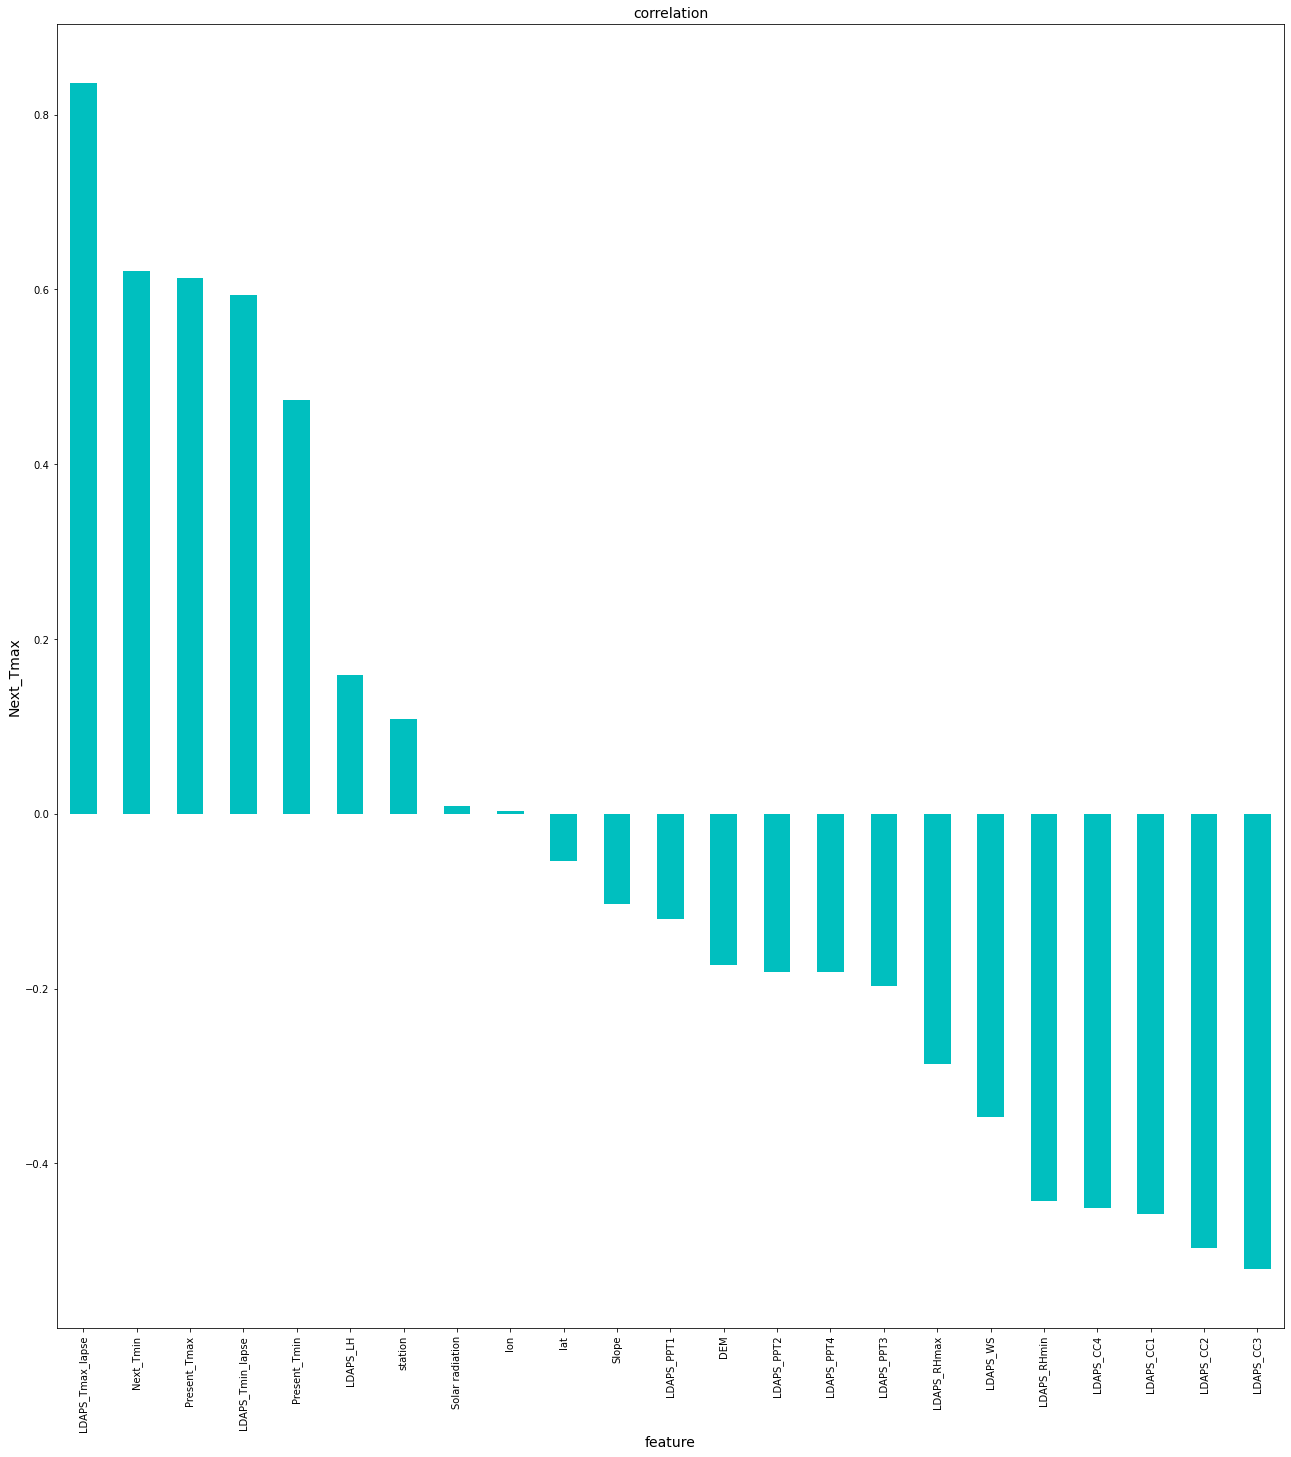

In [10]:
plt.figure(figsize=(22,24))
ds.corr()['Next_Tmax'].sort_values(ascending=False).drop(['Next_Tmax']).plot(kind='bar',color='c')
plt.xlabel('feature',fontsize=14)
plt.ylabel('Next_Tmax',fontsize=14)
plt.title('correlation',fontsize =14)
plt.show()

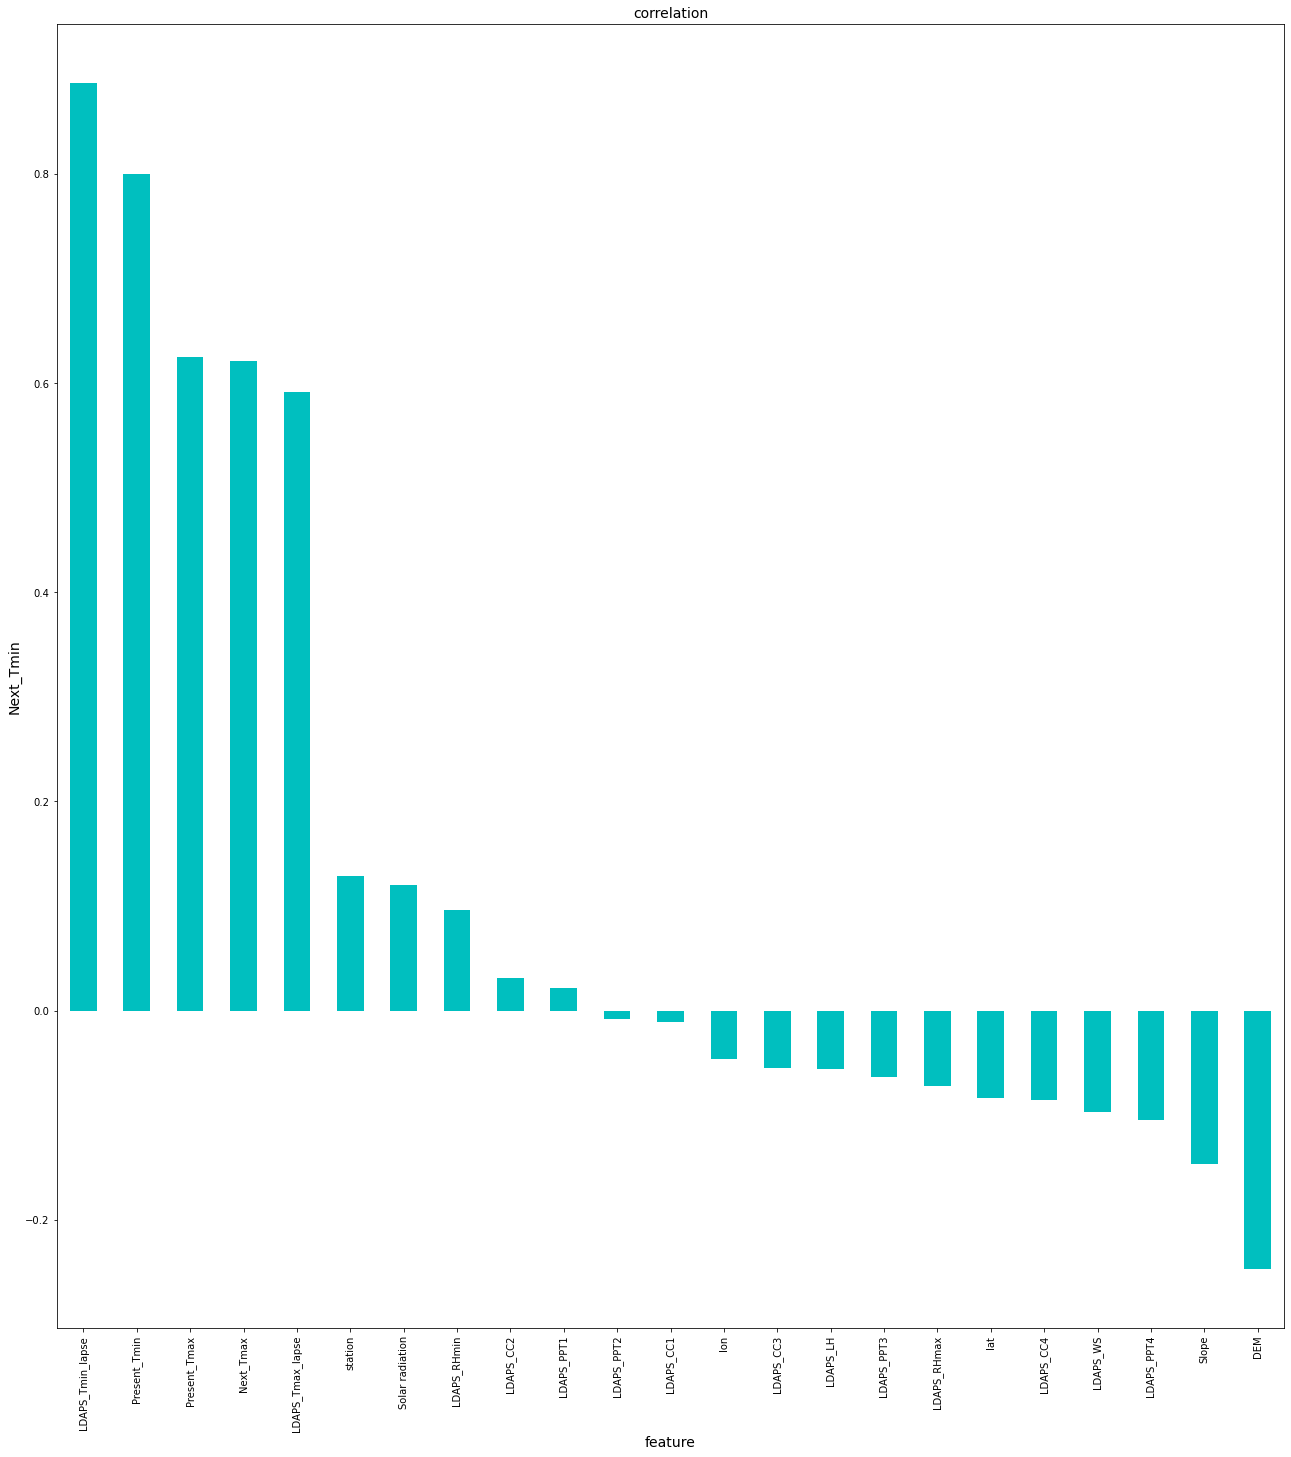

In [11]:
plt.figure(figsize=(22,24))
ds.corr()['Next_Tmin'].sort_values(ascending=False).drop(['Next_Tmin']).plot(kind='bar',color='c')
plt.xlabel('feature',fontsize=14)
plt.ylabel('Next_Tmin',fontsize=14)
plt.title('correlation',fontsize =14)
plt.show()

We can see from the the above graph: Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse are the only variables which are positively correlated, rest are negativeliy correlated. 

In [12]:
# droping the column station & Date , thet are correlated and conirbuting 
ds.drop(['station','Date'],axis=1,inplace=True)

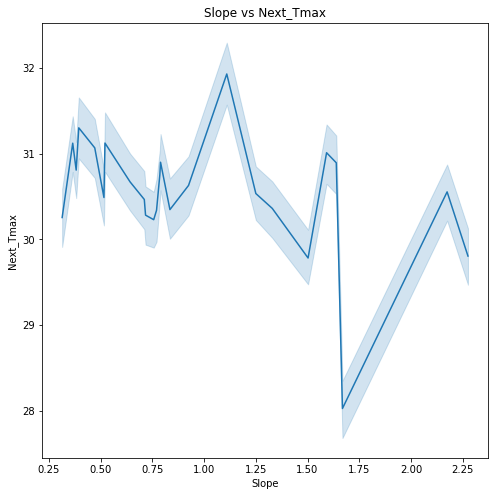

In [81]:
plt.figure(figsize=(8,8))
lx = sns.lineplot(x='Slope',y='Next_Tmax',data=dsnew)
lx.set_title("Slope vs Next_Tmax")
plt.show()

Key Observation: first with increse in slope target variable aslo increses later it start decreses

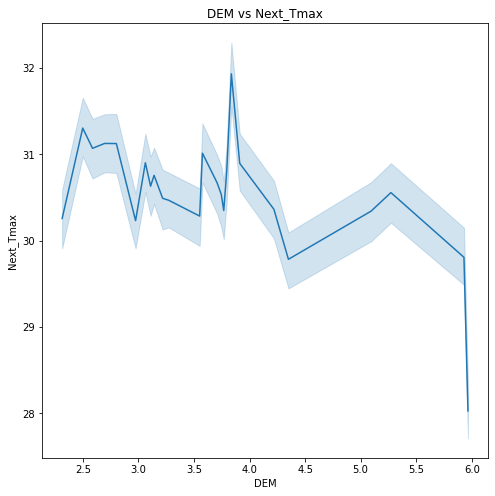

In [82]:
plt.figure(figsize=(8,8))
lx = sns.lineplot(x='DEM',y='Next_Tmax',data=dsnew)
lx.set_title("DEM vs Next_Tmax")
plt.show()

Slope and DEM variable have similiar relationship with the target variabel

# Finding Outliers and Skewness

<AxesSubplot:>

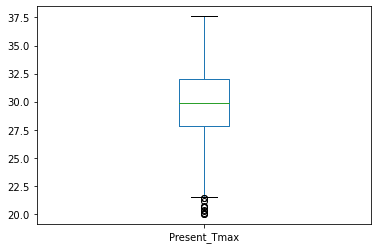

In [13]:
ds['Present_Tmax'].plot.box()

<AxesSubplot:>

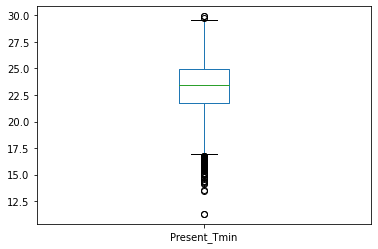

In [14]:
ds['Present_Tmin'].plot.box()

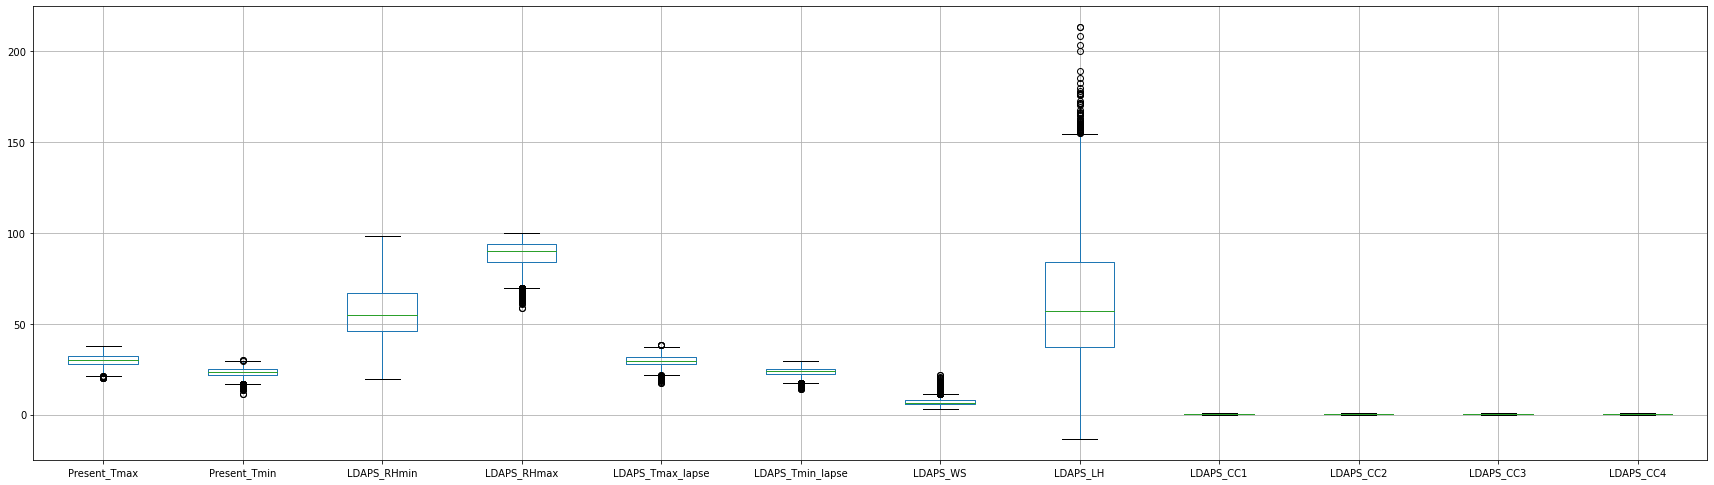

In [15]:
#Detecting Outliers
# Box plot for first 12 columns
ds.iloc[:,0:12].boxplot(figsize=[30,10])
plt.subplots_adjust(bottom=0.25)
plt.show()

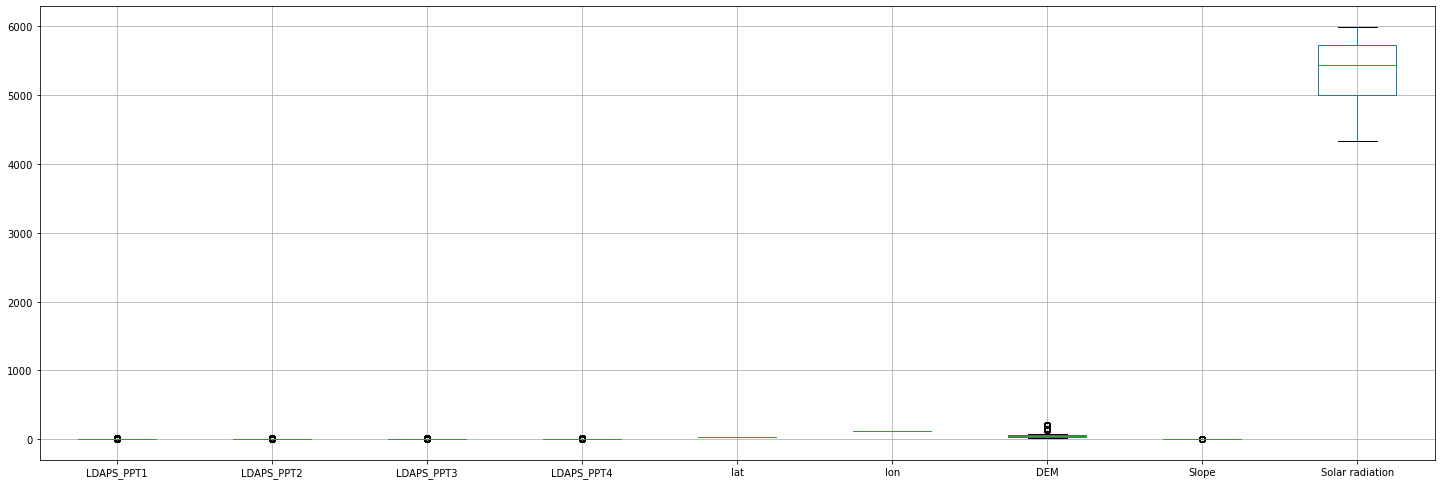

In [16]:

#Detecting Outliers
# Box plot for rest of the columns
ds.iloc[:,12:21].boxplot(figsize=[25,10])
plt.subplots_adjust(bottom=0.25)
plt.show()

Key onsservation: We can see there aoutliers present in most of the columns except Solar Radiation, Lat & lon.

In [17]:
# Cheking skew.
ds.skew()

Present_Tmax       -0.262942
Present_Tmin       -0.365875
LDAPS_RHmin         0.298765
LDAPS_RHmax        -0.850870
LDAPS_Tmax_lapse   -0.226775
LDAPS_Tmin_lapse   -0.578943
LDAPS_WS            1.571581
LDAPS_LH            0.670491
LDAPS_CC1           0.457231
LDAPS_CC2           0.470060
LDAPS_CC3           0.637630
LDAPS_CC4           0.663251
LDAPS_PPT1          5.367675
LDAPS_PPT2          5.747360
LDAPS_PPT3          6.425829
LDAPS_PPT4          6.792379
lat                 0.087062
lon                -0.285213
DEM                 1.723257
Slope               1.563020
Solar radiation    -0.511210
Next_Tmax          -0.339607
Next_Tmin          -0.403743
dtype: float64

Keeping the skewness range +0.5/-0.5, then we can see there is skweness presnt in LDAPS_WS,LDAPS_LH,LDAPS_CC1,DAPS_PPT2	LDAPS_PPT3	LDAPS_PPT4 columns.

# Removing Outliers and Skewness

In [18]:
#replacing missing values
from sklearn.impute import SimpleImputer
imp=SimpleImputer(strategy='mean')
ds['Present_Tmax']=imp.fit_transform(data['Present_Tmax'].values.reshape(-1,1))
ds['Present_Tmin']=imp.fit_transform(data['Present_Tmin'].values.reshape(-1,1))
ds['LDAPS_RHmin']=imp.fit_transform(data['LDAPS_RHmin'].values.reshape(-1,1))
ds['LDAPS_RHmax']=imp.fit_transform(data['LDAPS_RHmax'].values.reshape(-1,1))[:,0]
ds['LDAPS_Tmax_lapse']=imp.fit_transform(data['LDAPS_Tmax_lapse'].values.reshape(-1,1))[:,0]
ds['LDAPS_Tmin_lapse']=imp.fit_transform(data['LDAPS_Tmin_lapse'].values.reshape(-1,1))[:,0]
ds['LDAPS_WS']=imp.fit_transform(data['LDAPS_WS'].values.reshape(-1,1))[:,0]
ds['LDAPS_LH']=imp.fit_transform(data['LDAPS_LH'].values.reshape(-1,1))[:,0]
ds['LDAPS_CC1']=imp.fit_transform(data['LDAPS_CC1'].values.reshape(-1,1))[:,0]
ds['LDAPS_CC2']=imp.fit_transform(data['LDAPS_CC2'].values.reshape(-1,1))[:,0]
ds['LDAPS_CC3']=imp.fit_transform(data['LDAPS_CC3'].values.reshape(-1,1))[:,0]
ds['LDAPS_CC4']=imp.fit_transform(data['LDAPS_CC4'].values.reshape(-1,1))[:,0]
ds['LDAPS_PPT1']=imp.fit_transform(data['LDAPS_PPT1'].values.reshape(-1,1))[:,0]
ds['LDAPS_PPT2']=imp.fit_transform(data['LDAPS_PPT2'].values.reshape(-1,1))[:,0]
ds['LDAPS_PPT3']=imp.fit_transform(data['LDAPS_PPT3'].values.reshape(-1,1))[:,0]
ds['LDAPS_PPT4']=imp.fit_transform(data['LDAPS_PPT4'].values.reshape(-1,1))[:,0]
ds['LDAPS_PPT3']=imp.fit_transform(data['LDAPS_PPT3'].values.reshape(-1,1))[:,0]
ds['LDAPS_PPT4']=imp.fit_transform(data['LDAPS_PPT4'].values.reshape(-1,1))[:,0]
ds['Next_Tmax']=imp.fit_transform(data['Next_Tmax'].values.reshape(-1,1))[:,0]
ds['Next_Tmin']=imp.fit_transform(data['Next_Tmin'].values.reshape(-1,1))[:,0]
ds

,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,LDAPS_CC2,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
0,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,0.233947,0.203896,...,0.000000,0.000000,0.000000,37.6046,126.991,212.3350,2.785000,5992.895996,29.1,21.2
1,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,0.225508,0.251771,...,0.000000,0.000000,0.000000,37.6046,127.032,44.7624,0.514100,5869.312500,30.5,22.5
2,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,0.209344,0.257469,...,0.000000,0.000000,0.000000,37.5776,127.058,33.3068,0.266100,5863.555664,31.1,23.9
3,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,0.216372,0.226002,...,0.000000,0.000000,0.000000,37.6450,127.022,45.7160,2.534800,5856.964844,31.7,24.3
4,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,0.151407,0.249995,...,0.000000,0.000000,0.000000,37.5507,127.135,35.0380,0.505500,5859.552246,31.2,22.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7747,23.3,17.1,26.741310,78.869858,26.352081,18.775678,6.148918,72.058294,0.030034,0.081035,...,0.000000,0.000000,0.000000,37.5372,126.891,15.5876,0.155400,4443.313965,28.3,18.1
7748,23.3,17.7,24.040634,77.294975,27.010193,18.733519,6.542819,47.241457,0.035874,0.074962,...,0.000000,0.000000,0.000000,37.5237,126.909,17.2956,0.222300,4438.373535,28.6,18.8
7749,23.2,17.4,22.933014,77.243744,27.939516,18.522965,7.289264,9.090034,0.048954,0.059869,...,0.000000,0.000000,0.000000,37.5237,126.970,19.5844,0.271300,4451.345215,27.8,17.4
7750,20.0,11.3,19.794666,58.936283,17.624954,14.272646,2.882580,-13.603212,0.000000,0.000000,...,0.000000,0.000000,0.000000,37.4562,126.826,12.3700,0.098475,4329.520508,17.4,11.3


In [19]:
# Removing outliers
#m=ds[['Present_Tmax','Present_Tmin','LDAPS_RHmax','LDAPS_Tmax_lapse','LDAPS_WS','LDAPS_LH','LDAPS_Tmin_lapse','DEM']]
m=ds.drop(columns=['Next_Tmax','Next_Tmin'])

In [20]:
from scipy.stats import zscore
z=np.abs(zscore(m))
z
threshold=3
print(np.where(z>3))

(array([  25,   25,   26, ..., 7751, 7751, 7751], dtype=int64), array([ 6, 13, 13, ..., 13, 14, 15], dtype=int64))


In [21]:
# lets check the presence of outlier
print('shape before remooving the outliers:',ds.shape)
dsnew=ds[(z<3).all(axis=1)]

print('shape after remooving the outliers:',dsnew.shape)
# here 859 rows will be droped

shape before remooving the outliers: (7752, 23)
shape after remooving the outliers: (6907, 23)


<AxesSubplot:xlabel='LDAPS_WS', ylabel='Count'>

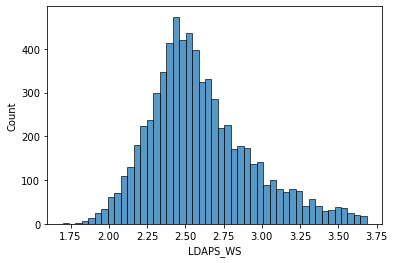

In [22]:
#Removing skewness
dsnew['LDAPS_WS']=np.sqrt(dsnew['LDAPS_WS'])
sns.histplot(dsnew['LDAPS_WS'])

<AxesSubplot:xlabel='LDAPS_PPT1', ylabel='Count'>

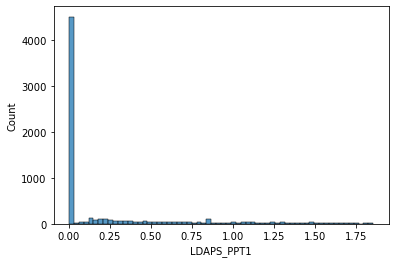

In [23]:
#Removing skewness
dsnew['LDAPS_PPT1']=np.cbrt(dsnew['LDAPS_PPT1'])
sns.histplot(dsnew['LDAPS_PPT1'])

<AxesSubplot:xlabel='LDAPS_PPT2', ylabel='Count'>

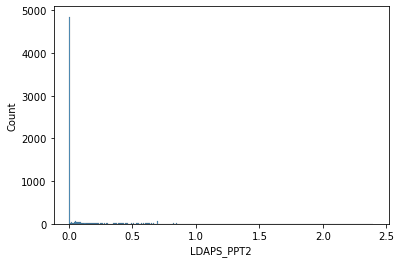

In [24]:
#Removing skewness
dsnew['LDAPS_PPT2']=np.sqrt(dsnew['LDAPS_PPT2'])
sns.histplot(dsnew['LDAPS_PPT2'])

<AxesSubplot:xlabel='LDAPS_PPT3', ylabel='Count'>

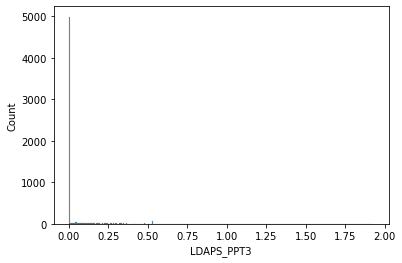

In [25]:
#Removing skewness
dsnew['LDAPS_PPT3']=np.sqrt(dsnew['LDAPS_PPT3'])
sns.histplot(dsnew['LDAPS_PPT3'])

<AxesSubplot:xlabel='Slope', ylabel='Count'>

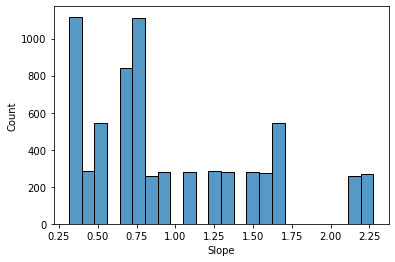

In [26]:
#Removing skewness
dsnew['Slope']=np.sqrt(dsnew['Slope'])
sns.histplot(dsnew['Slope'])

<AxesSubplot:xlabel='DEM', ylabel='Count'>

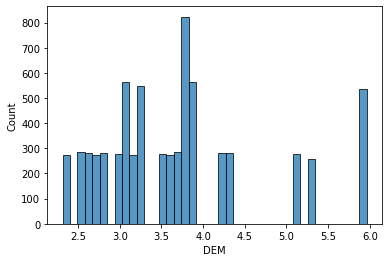

In [27]:
#Removing skewness
dsnew['DEM']=np.cbrt(dsnew['DEM'])
sns.histplot(dsnew['DEM'])

# Creating feature and target dataframe

In [28]:
x=dsnew.drop(columns=['Next_Tmax','Next_Tmin'])
y=dsnew['Next_Tmax']
y1=dsnew['Next_Tmin']

In [29]:
x.shape

(6907, 21)

In [30]:
y.shape

(6907,)

In [31]:
y1.shape

(6907,)

In [32]:
# lets bring all feature into common scale
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X=sc.fit_transform(x)

In [33]:
# To find the best random state using Linear Regressor model

from sklearn.metrics import r2_score
maxAccu=0
maxRS=0
for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=.30,random_state=i)
    mod=LinearRegression()
    mod.fit(x_train,y_train)
    pred=mod.predict(x_test)
    acc=r2_score(y_test,pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print ('best r2 score is',maxAccu,'on random state',maxRS)

best r2 score is 0.7588784149584111 on random state 47


In [34]:
# Sending the data for train and test using Train_test_Split 
# 30 % data will go for testing and 70% data will go for training the model
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=.30,random_state=maxRS)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(4834, 21)
(2073, 21)
(4834,)
(2073,)


In [35]:
# Train_test_Split for target varibale 2
# 30 % data will go for testing and 70% data will go for training the model
x1_train,x1_test,y1_train,y1_test=train_test_split(X,y1,test_size=.30,random_state=maxRS)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(4834, 21)
(2073, 21)
(4834,)
(2073,)


70% of the data (4834 rows) will be available for training the model & 30% (2073 rows) will be available for testing the model

# Model Building & Evaluation

Since the target variable as continuous values we can build the regression models. Therefore oue evalution criteria will be: Evaluation Matrics : MAE,MSE,RMSE and R2 Score

In [36]:
# Linear Regression model1 for y varibale
lm=LinearRegression()
lm.fit(x_train,y_train)
lm.score(x_train,y_train)

0.735117283136106

In [37]:
lm.intercept_

30.550860569259463

In [38]:
lm.intercept_
from sklearn.metrics import r2_score
pred=lm.predict(x_test)
print('Coefficient of determination',r2_score(y_test,pred))
print('mean absolute arror',mean_absolute_error(y_test,pred))
print('mean squarred arror',mean_squared_error(y_test,pred))
print('Root mean square arror',np.sqrt(mean_squared_error(y_test,pred)))

Coefficient of determination 0.7588784149584111
mean absolute arror 1.1074510891517562
mean squarred arror 2.1078811163890196
Root mean square arror 1.4518543716189374


In [39]:
# Linear Regression model1 for y2 second varibale
lm1=LinearRegression()
lm1.fit(x1_train,y1_train)
lm1.score(x1_train,y1_train)

0.817278227849854

In [40]:
lm1.intercept_

23.06182550689841

In [41]:
from sklearn.metrics import r2_score
pred=lm1.predict(x1_test)
print('Coefficient of determination',r2_score(y1_test,pred))
print('mean absolute arror',mean_absolute_error(y1_test,pred))
print('mean squarred arror',mean_squared_error(y1_test,pred))
print('Root mean square arror',np.sqrt(mean_squared_error(y1_test,pred)))

Coefficient of determination 0.8088970383744154
mean absolute arror 0.7958654638772954
mean squarred arror 1.0643353275169154
Root mean square arror 1.031666286895581


In [42]:
# Decision Tree Regression Model
dc=DecisionTreeRegressor()
dc.fit(x_train,y_train)
dc.score(x_train,y_train)

1.0

In [43]:
from sklearn.metrics import r2_score
pred=dc.predict(x_test)
print('Coefficient of determination',r2_score(y_test,pred))
print('mean absolute error',mean_absolute_error(y_test,pred))
print('mean squarred error',mean_squared_error(y_test,pred))
print('Root mean square error',np.sqrt(mean_squared_error(y_test,pred)))

Coefficient of determination 0.7205770228724195
mean absolute error 1.1341172760581806
mean squarred error 2.44271128555678
Root mean square error 1.5629175555853163


In [44]:
# Decision Tree Regression Model2 for sencond target varibale
dc1=DecisionTreeRegressor()
dc1.fit(x1_train,y1_train)
dc1.score(x1_train,y1_train)

1.0

In [45]:
from sklearn.metrics import r2_score
pred=dc1.predict(x1_test)
print('Coefficient of determination',r2_score(y1_test,pred))
print('mean absolute error',mean_absolute_error(y1_test,pred))
print('mean squarred error',mean_squared_error(y1_test,pred))
print('Root mean square error',np.sqrt(mean_squared_error(y1_test,pred)))

Coefficient of determination 0.7469130029062094
mean absolute error 0.8688079593229018
mean squarred error 1.409551320663727
Root mean square error 1.1872452655890977


In [46]:
# KNeighbors Regression Model
kn=KNeighborsRegressor()
kn.fit(x_train,y_train)
kn.score(x_train,y_train)

0.901532480831926

In [47]:
from sklearn.metrics import r2_score
pred=kn.predict(x_test)
print('Coefficient of determination',r2_score(y_test,pred))
print('mean absolute error',mean_absolute_error(y_test,pred))
print('mean squarred error',mean_squared_error(y_test,pred))
print('Root mean square error',np.sqrt(mean_squared_error(y_test,pred)))

Coefficient of determination 0.8484036784854909
mean absolute error 0.8543871099683555
mean squarred error 1.3252526661159623
Root mean square error 1.1511961892379432


In [48]:
# KNeighbors Regression Model2 foe second target varibale
kn1=KNeighborsRegressor()
kn1.fit(x1_train,y1_train)
kn1.score(x1_train,y1_train)

0.914392863307102

In [49]:
from sklearn.metrics import r2_score
pred=kn1.predict(x1_test)
print('Coefficient of determination',r2_score(y1_test,pred))
print('mean absolute error',mean_absolute_error(y1_test,pred))
print('mean squarred error',mean_squared_error(y1_test,pred))
print('Root mean square error',np.sqrt(mean_squared_error(y1_test,pred)))

Coefficient of determination 0.865539707050873
mean absolute error 0.6452901321818354
mean squarred error 0.7488677240618441
Root mean square error 0.8653714370499203


In [50]:
# Random Forest Regression Model
rf=RandomForestRegressor()
rf.fit(x_train,y_train)
rf.score(x_train,y_train)

0.9832734974381541

In [51]:
from sklearn.metrics import r2_score
pred=rf.predict(x_test)
print('Coefficient of determination',r2_score(y_test,pred))
print('mean absolute error',mean_absolute_error(y_test,pred))
print('mean squarred error',mean_squared_error(y_test,pred))
print('Root mean square error',np.sqrt(mean_squared_error(y_test,pred)))

Coefficient of determination 0.8842754290293716
mean absolute error 0.7558482795442093
mean squarred error 1.0116623852200324
Root mean square error 1.0058142896280766


In [52]:
# Random Forest Regression Model for second variable
rf1=RandomForestRegressor()
rf1.fit(x1_train,y1_train)
rf1.score(x1_train,y1_train)

0.9847718970489152

In [53]:
from sklearn.metrics import r2_score
pred=rf1.predict(x1_test)
print('Coefficient of determination',r2_score(y1_test,pred))
print('mean absolute error',mean_absolute_error(y1_test,pred))
print('mean squarred error',mean_squared_error(y1_test,pred))
print('Root mean square error',np.sqrt(mean_squared_error(y1_test,pred)))

Coefficient of determination 0.8856632243279352
mean absolute error 0.6066318282369877
mean squarred error 0.6367911232091715
Root mean square error 0.7979919317945335


Based on the results of above models, and comparing the R2 score and other evalution matrics result of MAE,MSE and RMSE.We can find the Random Forest Regression model is best model to predict the . Since the Random Forest model has the second hishest score(0.98) for both the target variables and R2 score(0.88) and lowest values of MAE, MSE,RMSE among other four models build above, it is the best model among the above five models

# Improving the model accuracy using cross Validation¶

In [54]:
from sklearn.model_selection import cross_val_score
lmscores =cross_val_score(lm,x,y,cv=5)
print(lmscores)
print(lmscores.mean(),lmscores.std())

[0.68937152 0.6512454  0.66387351 0.68785792 0.63046703]
0.6645630754144809 0.02235390226197203


In [55]:
# For model 2 for y1 variable
lm1scores =cross_val_score(lm1,x,y1,cv=5)
print(lm1scores)
print(lm1scores.mean(),lm1scores.std())

[0.71404855 0.65064895 0.79039032 0.8189126  0.83211808]
0.7612236986260099 0.0687851498052422


In [56]:
dcscores =cross_val_score(dc,x,y,cv=5)
print(dcscores)
print(dcscores.mean(),dcscores.std())

[0.41491204 0.43043934 0.43230259 0.44555751 0.35517636]
0.4156775672816587 0.031774501783602534


In [57]:
# For model 2 for y1 variable
dc1scores =cross_val_score(dc1,x,y1,cv=5)
print(dc1scores)
print(dc1scores.mean(),dc1scores.std())

[0.36984431 0.44889122 0.61873466 0.67907148 0.69473147]
0.5622546267522548 0.12981469658622805


In [58]:
from sklearn.model_selection import cross_val_score
knnscores =cross_val_score(kn,x,y,cv=5)
print(knnscores)
print(knnscores.mean(),knnscores.std())

[ 0.38272418 -0.09558803  0.03922588  0.30455417  0.16036692]
0.15825662542956442 0.17343502192436108


In [59]:
# For model 2 for y1 variable
knn1scores =cross_val_score(kn,x,y1,cv=5)
print(knn1scores)
print(knn1scores.mean(),knn1scores.std())

[-0.08145432 -0.39169953  0.15123658  0.25185604  0.32076543]
0.05014084158064687 0.25949460086580267


In [60]:
from sklearn.model_selection import cross_val_score
rfscores =cross_val_score(rf,x,y,cv=5)
print(rfscores)
print(rfscores.mean(),rfscores.std())

[0.71019247 0.64570972 0.64019621 0.7028806  0.60988083]
0.661771966670287 0.038602237093660736


In [61]:
# For model 2 for y1 variable
rf1scores =cross_val_score(rf1,x,y1,cv=5)
print(rf1scores)
print(rf1scores.mean(),rf1scores.std())

[0.68515305 0.68313694 0.80557304 0.8247062  0.83139173]
0.7659921919041105 0.06736621758204453


It can be observed that the'Random Forest Classifier' algorithim has the better accuracy score before and after the cross validation compare to other models. So the best model with highet accuracy score and best on evalution with other matrix is "Random Forest Regression" is the best model for predicting the Temperature.

# HyperParameter Tuning

In [68]:
from sklearn.model_selection import GridSearchCV 
parameter={'criterion':['mse', 'mae'],'max_features':['auto', 'sqrt']}

In [69]:
GCV=GridSearchCV(RandomForestRegressor(),parameter,cv=5)

In [70]:
GCV.fit(x_train,y_train)

GridSearchCV(cv=3, estimator=RandomForestRegressor(),
             param_grid={'criterion': ['mse', 'mae'],
                         'max_features': ['auto', 'sqrt']})

In [71]:
GCV.best_params_

{'criterion': 'mse', 'max_features': 'sqrt'}

In [72]:
rf_final=RandomForestRegressor(criterion= 'mse', max_depth= 30, max_features= 'sqrt')
rf_final.fit(x_train,y_train)
rf_final.score(x_train,y_train)

0.9841701109181825

In [73]:
from sklearn.metrics import r2_score
pred=rf_final.predict(x_test)
print('Coefficient of determination',r2_score(y_test,pred))
print('mean absolute error',mean_absolute_error(y_test,pred))
print('mean squarred error',mean_squared_error(y_test,pred))
print('Root mean square error',np.sqrt(mean_squared_error(y_test,pred)))

Coefficient of determination 0.8887126031156907
mean absolute error 0.7474234041302911
mean squarred error 0.972872678918668
Root mean square error 0.9863430837790003


In [74]:
rf1_final=RandomForestRegressor(criterion= 'mse', max_depth= 30, max_features= 'log2')
rf1_final.fit(x1_train,y1_train)
rf1_final.score(x1_train,y1_train)

0.9855786566218329

In [75]:
from sklearn.metrics import r2_score
pred=rf1_final.predict(x1_test)
print('Coefficient of determination',r2_score(y1_test,pred))
print('mean absolute error',mean_absolute_error(y1_test,pred))
print('mean squarred error',mean_squared_error(y1_test,pred))
print('Root mean square error',np.sqrt(mean_squared_error(y1_test,pred)))

Coefficient of determination 0.893678627484392
mean absolute error 0.588320069597167
mean squarred error 0.592149864533014
Root mean square error 0.7695127448801703


# Saving the best Model

Lets save the best model "Random Forest Regression Model for both the target variable

In [76]:
import joblib
joblib.dump(rf_final,'Model_Temperature-min.obj')

['Model_Temperature-min.obj']

In [77]:
import joblib
joblib.dump(rf_final,'Model_Temperature-max.obj')

['Model_Temperature-max.obj']